## The Euler-Cromer Method of Non-Binary Orbital System

In [19]:
# import the packages
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# the constants

G = 4*(np.pi**2) # gravitational constant units: AU^3/yr^2
M = 1 # solar mass ... makes equations easier
R = 1 # AU for circular orbits

In [27]:
# initialising variables / initial conditions

# initial position = x0 and y0 (in AU)
# initial velocity = v_x and v_y (in AU/yr)
# these can be changed accordingly

# initial position
x0 = 1
y0 = 0

# initial velocity
v_x = 0
v_y = 2*np.pi

In [28]:
# Using Kepler's Third Law, the equation of a period of a circular orbit is

T = np.sqrt(((4*(np.pi**2))/G*M)*R**3)

# the time step - small iteration for the loop to show the approximate motion at that time for that x amount of time

dt = 0.015
step = int(T/dt)    # how many years iteration

# to store the trajectories, use arrays
xvalues = [x0]
yvalues = [y0]

# initialise the variables so that it uses after the ones stored in the array
x = x0
y = y0

# to be used when the volecity is getting updated
vx = v_x
vy = v_y

energies = []
times = []

In [29]:
# Using the Euler-Cromer loop  

for i in range(step):
    r = np.sqrt(x**2 + y**2)    # distance from the Sun circular orbit and modulus
    ax, ay = -(G*M*x)/(r**3), -(G*M*y)/(r**3)    # acceleration in the x and y direction

    # updating the velocity
    vx += dt*ax
    vy += dt*ay

    # updating the position vector
    x += dt*vx
    y += dt*vy

    # adds the new trajectories to the end of the list
    # snapshot interval to only add every 20th value
    snap = 2
    if i % snap == 0:
        xvalues.append(x)
        yvalues.append(y)

    # computing the total energy of the orbit
    # KE + PE = total energy of the body in orbit

    KE = 0.5*(1)*np.sqrt((vx**2 + vy**2))**2
    PE = -G*M / r

    E = KE + PE
    energies.append(E)
    times.append(i*dt)

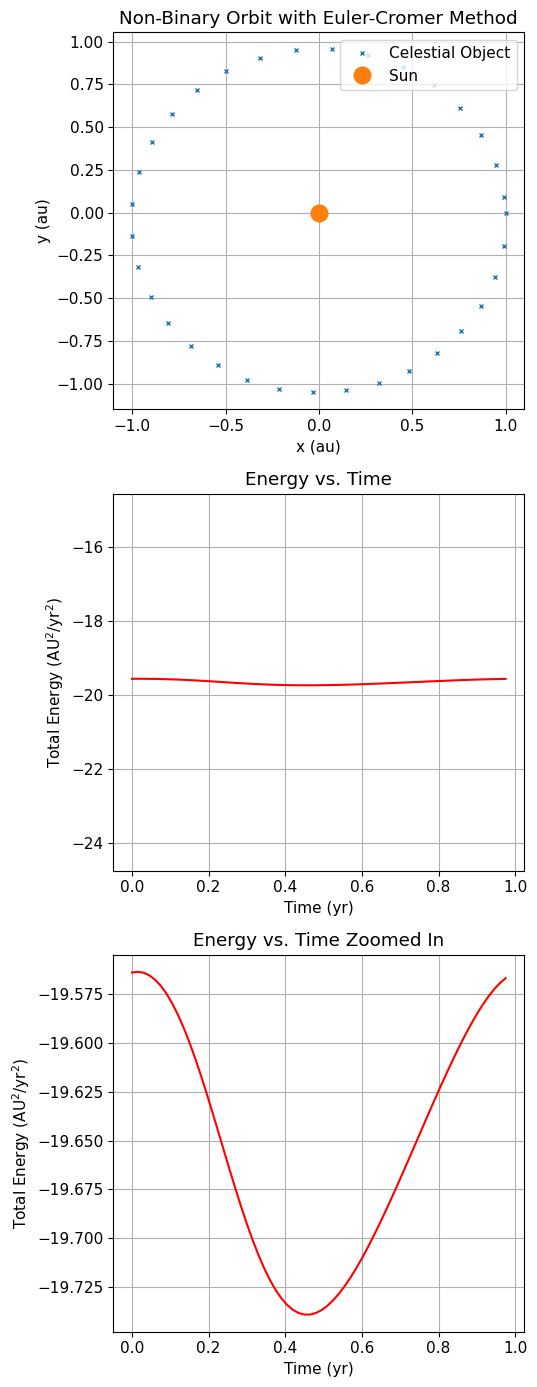

In [30]:
plt.figure(figsize=(5.5,14))

# plotting the loop
plt.subplot(3,1,1)
plt.plot(xvalues, yvalues, 'x', markersize = 3, label = "Celestial Object") # orbit of the object
plt.plot(0, 0, "o", markersize = 12, label = "Sun")   # the Sun marker
plt.title('Non-Binary Orbit with Euler-Cromer Method')
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.legend(loc='upper right')
plt.grid()

# energy time plot
plt.subplot(3,1,2)
plt.plot(times, energies, color='red')
plt.ylim(min(energies)-5, max(energies)+5)
plt.title('Energy vs. Time')
plt.xlabel("Time (yr)")
plt.ylabel("Total Energy (AU$^2$/yr$^2$)")
plt.grid()

# energy time plot zoomed in
plt.subplot(3,1,3)
plt.plot(times, energies, color='red')
plt.title('Energy vs. Time Zoomed In')
plt.xlabel("Time (yr)")
plt.ylabel("Total Energy (AU$^2$/yr$^2$)")
plt.grid()

plt.tight_layout()

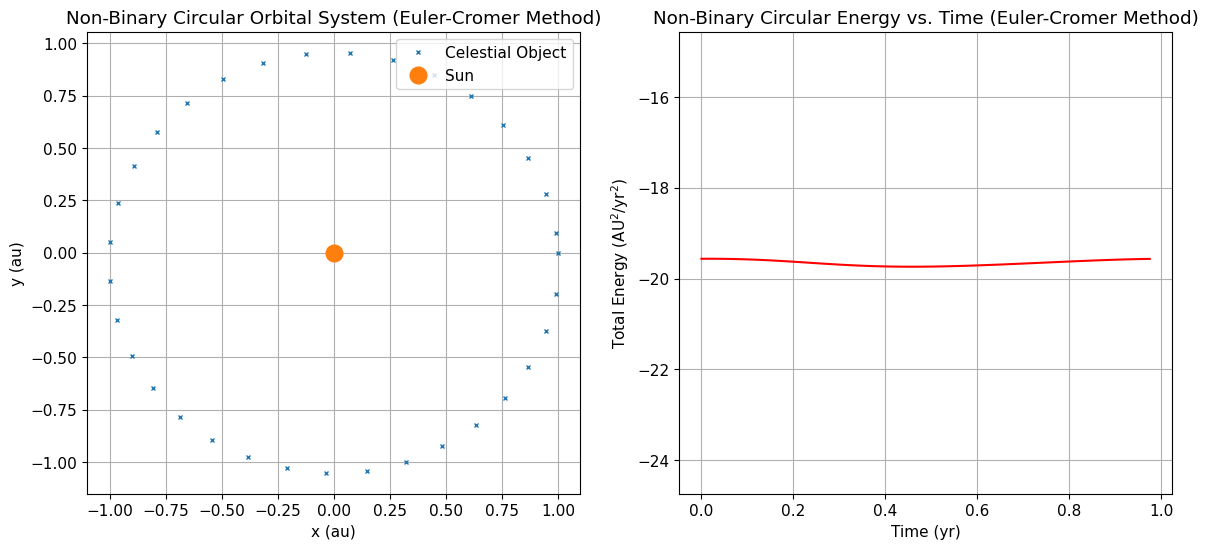

In [31]:
plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 11})

# plotting the loop
plt.subplot(1,2,1)
plt.plot(xvalues, yvalues, 'x', markersize = 3, label = "Celestial Object") # orbit of the object
plt.plot(0, 0, "o", markersize = 12, label = "Sun")   # the Sun marker
plt.title('Non-Binary Circular Orbital System (Euler-Cromer Method)')
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.legend(loc='upper right')
plt.grid()

# energy time plot
plt.subplot(1,2,2)
plt.plot(times, energies, color='red')
plt.ylim(min(energies)-5, max(energies)+5)
plt.title('Non-Binary Circular Energy vs. Time (Euler-Cromer Method)')
plt.xlabel("Time (yr)")
plt.ylabel("Total Energy (AU$^2$/yr$^2$)")
plt.grid()